In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
# 경량화된 MNIST dataset

from sklearn.datasets import load_digits

mnist = load_digits()

In [3]:
X = mnist["data"]

print(X.shape)
X

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y = mnist["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [5]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot

C:\Users\BKLEE\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(1797, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Activate Functions

### Sigmoid

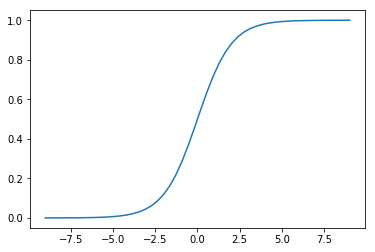

In [13]:
# Write your code here!
%matplotlib inline

def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=9)
yy = sigmoid(xx)

plt.plot(xx,yy)

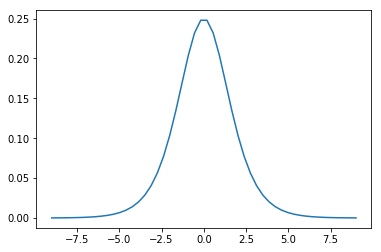

In [14]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=9)
yy = sigmoid_derivative(xx)

plt.plot(xx,yy)

### ReLU

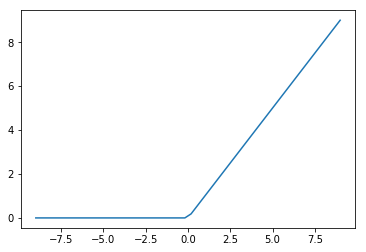

In [16]:
# Write your code here!

def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=9)
yy = relu(xx)

plt.plot(xx,yy)

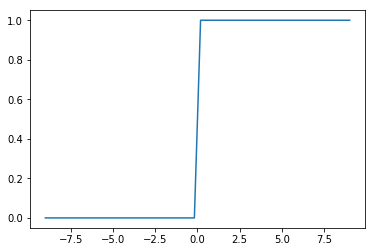

In [18]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=9)
yy = relu_derivative(xx)

plt.plot(xx,yy)

### Benchmark

In [19]:
%time tmp = [sigmoid(i) for i in range(10000000)]
%time tmp = [sigmoid_derivative(i) for i in range(10000000)]

Wall time: 19.8 s
Wall time: 42.1 s


In [20]:
%time tmp = [relu(i) for i in range(10000000)]
%time tmp = [relu_derivative(i) for i in range(10000000)]

Wall time: 2.11 s
Wall time: 1.9 s


## Train

In [25]:
import time

def train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]

    w1 = np.random.uniform(low=-np.sqrt(6 / (num_input + 100)), high=np.sqrt(6 / (num_input + 100)), size=(num_input, 100))
    w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)), high=np.sqrt(6 / (100 + 100)), size=(100, 100))
    w3 = np.random.uniform(low=-np.sqrt(6 / (100 + num_output)), high=np.sqrt(6 / (100 + 10)), size=(100, num_output))

    history = []

    start = time.time()

    for epoch in range(num_epoch):
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)
        #마지막 sigmoid 대신 softmax가 더 보편적이다.
        
        y_predict = np.argmax(a3, axis=1)    
        error = (y != y_predict).mean()

        if epoch % 10 == 0:
            print("{0:2} error = {1:.5f}".format(epoch, error))

        end = time.time()
        history.append({
            'time': end - start,
            'error': error
        })

        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

    end = time.time()
    elapsed = end - start

    return history, error, elapsed

### Sigmoid

In [32]:
# Write your code here!
num_epoch=100
learning_rate=0.0003

sigmoid_history, error, elapsed = \
    train(X, y, y_hot, num_epoch, learning_rate,
         activation=sigmoid,
         activation_derivative=sigmoid_derivative)
    
print("----" * 10)
print("[sigmoid] Elapsed = {0:.2f} seconds, error = {1:.5f}" \
     .format(elapsed, error))

 0 error = 0.89983
10 error = 0.42571
20 error = 0.30885
30 error = 0.28937
40 error = 0.27769
50 error = 0.23038
60 error = 0.19310
70 error = 0.17140
80 error = 0.14969
90 error = 0.14190
----------------------------------------
[sigmoid] Elapsed = 4.78 seconds, error = 0.13300


### ReLU

In [33]:
# Write your code here!
num_epoch=100
learning_rate=0.00001

relu_history, error, elapsed = \
    train(X, y, y_hot, num_epoch, learning_rate,
         activation=relu,
         activation_derivative=relu_derivative)
    
print("----" * 10)
print("[sigmoid] Elapsed = {0:.2f} seconds, error = {1:.5f}" \
     .format(elapsed, error))

 0 error = 0.88203
10 error = 0.25153
20 error = 0.12855
30 error = 0.08681
40 error = 0.06344
50 error = 0.05398
60 error = 0.04508
70 error = 0.04118
80 error = 0.03450
90 error = 0.03116
----------------------------------------
[sigmoid] Elapsed = 1.57 seconds, error = 0.02838


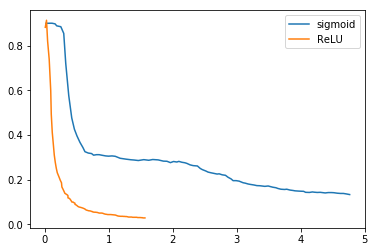

In [37]:
import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history)
relu_history = pd.DataFrame(relu_history)

plt.plot(sigmoid_history["time"], sigmoid_history["error"], label="sigmoid")
plt.plot(relu_history["time"], relu_history["error"], label="ReLU")

plt.legend()
